In [169]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [170]:
train_path = '/Users/liujianyi/MSBD5001-Individual-Project/train.csv'
test_path = 'Users/liujianyi/MSBD5001-Individual-Project/test.csv'

In [171]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
train.head()

,id,MO HLADR+ MFI (cells/ul),Neu CD64+MFI (cells/ul),CD3+T (cells/ul),CD8+T (cells/ul),CD4+T (cells/ul),NK (cells/ul),CD19+ (cells/ul),CD45+ (cells/ul),Age,Sex 0M1F,Mono CD64+MFI (cells/ul),label
0,0,3556.0,2489.0,265.19,77.53,176.55,0.00,4.20,307.91,52,0,7515.0,1
1,1,1906.0,134.0,1442.61,551.90,876.07,112.10,168.15,1735.48,20,1,1756.0,0
2,2,1586.0,71.0,1332.74,684.20,655.26,244.95,216.52,1820.04,28,1,1311.0,0
3,3,683.0,94.0,419.23,255.80,162.17,72.05,44.68,538.22,55,1,1443.0,0
4,4,1032.0,71.0,1102.72,480.27,625.30,188.78,130.77,1427.97,28,1,1542.0,0


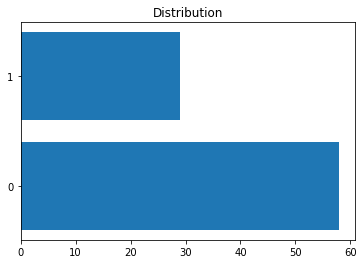

In [172]:
c_distribution = train['label'].value_counts()
plt.title('Distribution')
plt.barh(c_distribution.index, c_distribution.values)
plt.yticks([0, 1])
plt.show()

In [173]:
#Fill Missing Value
miss_column = ['MO HLADR+ MFI (cells/ul)','Neu CD64+MFI (cells/ul)','Mono CD64+MFI (cells/ul)']
for column in miss_column:
    f = train[train['label'] == 0][column].mean()
    train[column] = train[column].fillna(f)

In [174]:
X_train,y_train = train[[i for i in train.columns if i not in['id','label']]],train['label']        
X_test = test[[i for i in train.columns if i not in['id','label']]]

In [175]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100,random_state = 20)
rf = rf.fit(X_train, y_train)

In [180]:
for i in range (1,9):
    threshold = i * 0.1
    p = rf.predict_proba(X_train)
    y_pred = (p [:,1] >= threshold).astype('int')
    print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.79      0.88        58
           1       0.71      1.00      0.83        29

    accuracy                           0.86        87
   macro avg       0.85      0.90      0.86        87
weighted avg       0.90      0.86      0.87        87

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        58
           1       0.91      1.00      0.95        29

    accuracy                           0.97        87
   macro avg       0.95      0.97      0.96        87
weighted avg       0.97      0.97      0.97        87

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        29

    accuracy                           1.00        87
   macro avg       1.00      1.00      1.00        87
weighted avg       1.00      1.00      1.00        87

              preci

In [178]:
#submit
p = rf.predict_proba(X_test)
threshold = 0.5
pred = (p[:,1] >= threshold).astype('int')
pd.DataFrame({"id":range(59),"label":pred}).to_csv("Users/liujianyi/MSBD5001-Individual-Project/submission.csv",index=None)